# Bankruptcy Prediction

## Introduction:

Bankruptcy detection is a major topic in finance. Indeed, for obvious reasons, many actors such as shareholders, managers or banks are interested in the likelihood of bankruptcy of firms. So, I decide applying several advanced Machine Learning techniques including **`Logistic Regression`**, **`Decision Tree`**, **`Random Forest`**, **`Support Vector Machine`** algorithms to predict the bankruptcy of companies in Taiwan from 1990 to 2009.

## Dataset:
The data were collected from the Taiwan Economic Journal for the years 1999 to 2009. Company bankruptcy was defined based on the Taiwan Stock Exchange business regulations.

**`Kaggle`**: https://www.kaggle.com/datasets/fedesoriano/company-bankruptcy-prediction


In [1]:
# Import libraries

# Data Analysis
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.model_selection import train_test_split

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Evaluate performance
from sklearn.metrics import confusion_matrix, accuracy_score

In [2]:
# Read data
pd.set_option('display.max_columns', None)

df = pd.read_csv('bankruptcy data.csv')
df

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256970e-04,0.000000e+00,0.458143,7.250730e-04,0.000000,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,0.390284,0.006479,0.095885,0.137757,0.398036,0.086957,0.001814,0.003487,1.820930e-04,1.165010e-04,0.032903,0.034164,0.392913,0.037135,0.672775,0.166673,0.190643,0.004094,0.001997,1.473360e-04,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,2.559237e-02,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,0.424206,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897850e-04,0.000000e+00,0.461867,6.470650e-04,0.000000,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,0.376760,0.005835,0.093743,0.168962,0.397725,0.064468,0.001286,0.004917,9

In [3]:
# Summarize DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [4]:
df.isnull().sum()

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 96, dtype: int64

In [5]:
df['Bankrupt?'].value_counts()

0    6599
1     220
Name: Bankrupt?, dtype: int64

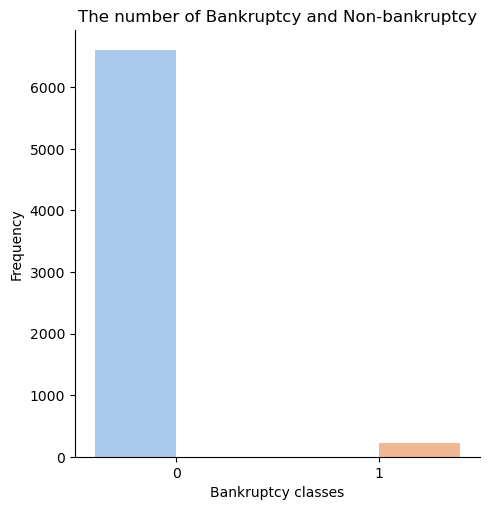

In [6]:
# Generate plot
sns.catplot(data=df, x='Bankrupt?', hue='Bankrupt?', kind='count', palette='pastel')
plt.title('The number of Bankruptcy and Non-bankruptcy')
plt.xlabel('Bankruptcy classes')
plt.ylabel('Frequency')
plt.show()

In [7]:
# Defining dependent and independent variables
X = df.drop(columns=['Bankrupt?'])
y = df['Bankrupt?']

In [8]:
# Splitting data into training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

X_train shape: (5455, 95)
X_test shape: (1364, 95)
y_train shape: (5455,)
y_test shape: (1364,)


## Logistic Regression


In [10]:
# Training model
lr_model = LogisticRegression(max_iter = 10000)
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [11]:
# Checking R-squared in training and testing dataset
print('R-squared in training dataset:', lr_model.score(X_train, y_train))
print('R-squared in testing dataset:', lr_model.score(X_test, y_test))

R-squared in training dataset: 0.967186067827681
R-squared in testing dataset: 0.9611436950146628


In [12]:
# Confusion matrix
yhat_lr = lr_model.predict(X_test)
lr_cm = confusion_matrix(y_test, yhat_lr)
print('Accuracy score:', accuracy_score(y_test, yhat_lr))
print('Confusion Matrix:\n', lr_cm)

Accuracy score: 0.9611436950146628
Confusion Matrix:
 [[1311    2]
 [  51    0]]


## Decision Tree

In [13]:
# Training model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [14]:
# Checking R-squared in training and testing dataset
print('R-squared in training dataset:', dt_model.score(X_train, y_train))
print('R-squared in testing dataset:', dt_model.score(X_test, y_test))

R-squared in training dataset: 1.0
R-squared in testing dataset: 0.9508797653958945


In [15]:
# Confusion matrix
yhat_dt = dt_model.predict(X_test)
dt_cm = confusion_matrix(y_test, yhat_dt)
print('Accuracy score:', accuracy_score(y_test, yhat_dt))
print('Confusion Matrix:\n', dt_cm)

Accuracy score: 0.9508797653958945
Confusion Matrix:
 [[1282   31]
 [  36   15]]


## Random Forest

In [16]:
# Training model
rf_model = RandomForestClassifier(n_estimators=40)
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=40)

In [17]:
# Checking R-squared in training and testing dataset
print('R-squared in training dataset:', rf_model.score(X_train, y_train))
print('R-squared in testing dataset:', rf_model.score(X_test, y_test))

R-squared in training dataset: 0.999083409715857
R-squared in testing dataset: 0.969208211143695


In [18]:
n_lst = []
accuracy_lst = []

for n in range(10, 41):
    n_lst.append(n)
    rf_model = RandomForestClassifier(n_estimators=n)
    rf_model.fit(X_train, y_train)
    yhat_rf = rf_model.predict(X_test)
    accuracy = accuracy_score(y_test, yhat_rf) * 100
    accuracy_lst.append(accuracy)

    print('n =', n,'- Accuracy:', accuracy,'%')

n = 10 - Accuracy: 96.62756598240469 %
n = 11 - Accuracy: 96.7741935483871 %
n = 12 - Accuracy: 96.48093841642229 %
n = 13 - Accuracy: 96.7741935483871 %
n = 14 - Accuracy: 96.7008797653959 %
n = 15 - Accuracy: 96.62756598240469 %
n = 16 - Accuracy: 96.7008797653959 %
n = 17 - Accuracy: 96.40762463343108 %
n = 18 - Accuracy: 96.5542521994135 %
n = 19 - Accuracy: 96.9208211143695 %
n = 20 - Accuracy: 96.8475073313783 %
n = 21 - Accuracy: 96.40762463343108 %
n = 22 - Accuracy: 96.7008797653959 %
n = 23 - Accuracy: 96.7008797653959 %
n = 24 - Accuracy: 96.7741935483871 %
n = 25 - Accuracy: 96.7008797653959 %
n = 26 - Accuracy: 96.7741935483871 %
n = 27 - Accuracy: 96.62756598240469 %
n = 28 - Accuracy: 96.7741935483871 %
n = 29 - Accuracy: 96.7741935483871 %
n = 30 - Accuracy: 96.5542521994135 %
n = 31 - Accuracy: 97.0674486803519 %
n = 32 - Accuracy: 96.7008797653959 %
n = 33 - Accuracy: 96.7741935483871 %
n = 34 - Accuracy: 96.62756598240469 %
n = 35 - Accuracy: 96.62756598240469 %
n = 

In [19]:
index = accuracy_lst.index(max(accuracy_lst))
n_best = n_lst[index]
print('Appropriate n value:', n_best, '- Accuracy:', accuracy_lst[index])

Appropriate n value: 31 - Accuracy: 97.0674486803519


In [20]:
# Training new model
new_rf_model = RandomForestClassifier(n_estimators=n_best)
new_rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=31)

In [21]:
# Confusion matrix
yhat_new_rf = new_rf_model.predict(X_test)
rf_cm = confusion_matrix(y_test, yhat_new_rf)
print('Accuracy score:', accuracy_score(y_test, yhat_new_rf))
print('Confusion Matrix:\n', rf_cm)

Accuracy score: 0.969208211143695
Confusion Matrix:
 [[1313    0]
 [  42    9]]


## Support Vector Machine

In [22]:
# Training model
svc_model = SVC()
svc_model.fit(X_train, y_train)

SVC()

In [23]:
# Confusion matrix
yhat_svc = svc_model.predict(X_test)
svc_cm = confusion_matrix(y_test, yhat_svc)
print('Accuracy score:', accuracy_score(y_test, yhat_svc))
print('Confusion Matrix:\n', svc_cm)

Accuracy score: 0.9626099706744868
Confusion Matrix:
 [[1313    0]
 [  51    0]]


## Choosing the best Machine Learning model

In [24]:
# Comparing Machine Learning models' accuracy
lra = accuracy_score(y_test, yhat_lr)
dta = accuracy_score(y_test, yhat_dt)
rfa = accuracy_score(y_test, yhat_new_rf)
svca = accuracy_score(y_test, yhat_svc)

model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Support Vector Machine']
accuracy_scores = [lra, dta, rfa, svca]

model_accuracy = {'Models': model_names, 'Accuracy': accuracy_scores}
mac = pd.DataFrame(model_accuracy)
mac.sort_values(by='Accuracy', ascending=True, inplace=True)
mac.set_index('Models', inplace=True)
mac.style.highlight_max(subset='Accuracy', color='yellow', axis=0)

,Accuracy
Models,
Decision Tree,0.950880
Logistic Regression,0.961144
Support Vector Machine,0.962610
Random Forest,0.969208


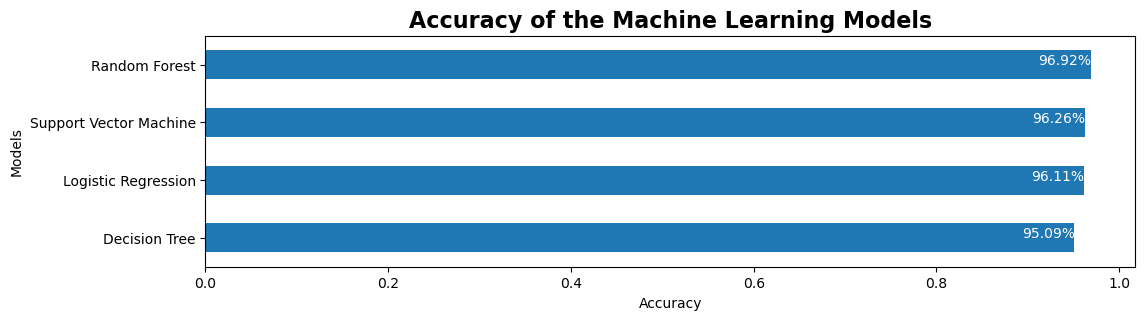

Based on the results obtained, it can be concluded that the Random Forest model has the best performance than other models with accuracy score is 96.92%


In [25]:
# Generate plot
mac.plot(kind='barh', figsize=(12, 3))
plt.title('Accuracy of the Machine Learning Models', fontsize=16, fontweight='bold')
plt.xlabel('Accuracy')
plt.legend().set_visible(False)

for index, value in enumerate(round(mac['Accuracy'], 4)):
    plt.text(value - (value*0.06), index, str(value*100) + '%', color='white')

plt.show()

# In conclusion
print(f"Based on the results obtained, it can be concluded that the {mac['Accuracy'].idxmax()} model\
 has the best performance than other models with accuracy score is {round(mac['Accuracy'].max()*100, 2)}%")